In [32]:
import tensorflow as tf

learning_rate = 1e-2
training_iters = 500
batch_size = 500
display_step = 10

# 图片shape 32x32x3 = 3072
# n_input = 3072

n_input = 784
# 共10类
n_classes = 10

dropout = 0.85

In [33]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot='true')

Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [34]:
x = tf.placeholder(tf.float32, [None, n_input], name='n_input')
y = tf.placeholder(tf.float32, [None, n_classes], name='n_classes')
keep_prob = tf.placeholder(tf.float32)

In [35]:
# 给定卷集步幅
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1],
                     padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


# 定义一个dropout
def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')

In [36]:
# 定义两个卷积层， 一个全连接层作为网络输出
def conv_net(x, weights, biases, dropout):
    x = tf.reshape(x, shape=[-1, 28, 28, 1])
    #     x = tf.reshape(x, shape = [-1, 32, 32, 1])

    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    conv1 = maxpool2d(conv1, k=2)

    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    conv2 = maxpool2d(conv2, k=2)

    # 匹配全连接层的输入
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    # forward
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    # relu
    fc1 = tf.nn.relu(fc1)
    # dropout
    fc1 = tf.nn.dropout(fc1, dropout)

    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [37]:
# 权重
weights = {
    # 5x5 conv, 1 input, 32 output
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    # 5x5 conv, 32 input, 64 output
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # 全连接层
    'wd1': tf.Variable(tf.random_normal([7 * 7 * 64, 1024])),
    # 输出层 1024input， n类输出
    'out': tf.Variable(tf.random_normal([1024, n_classes]))
}

# biases
biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [38]:
# model
pred = conv_net(x, weights, biases, keep_prob)
# 损失
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,
                                                              labels=y))
# 使用Adam优化器
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(pred, 1),
                              tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [39]:
init = tf.global_variables_initializer()

In [40]:
train_loss = []
train_acc = []
test_acc = []

with tf.Session() as sess:
    sess.run(init)
    step = 1
    while step <= training_iters:
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # print(batch_x.shape)
        # print(batch_y.shape)
        sess.run(optimizer, feed_dict={x: batch_x,
                                       y: batch_y,
                                       keep_prob: 1.})
        if step % display_step == 0:
            loss_train, acc_train = sess.run([cost, accuracy],
                                             feed_dict={x: batch_x,
                                                        y: batch_y,
                                                        keep_prob: 1.})
            print("Iter" + str(step) + ", Minibatch Loss=" +
                  ":{}".format(loss_train) + ", Training Accuracy=" +
                  ":{}".format(acc_train))
            acc_test = sess.run(accuracy,
                                feed_dict={x: batch_x,
                                           y: batch_y,
                                           keep_prob: 1.})
            print("Testing Accuracy:" +
                  ":{}".format(acc_train))
            train_loss.append(loss_train)
            train_acc.append(acc_train)
            test_acc.append(acc_test)
        step += 1
    saver = tf.train.Saver()
    model_path = './model.ckpt'
    save_path = saver.save(sess, model_path)

Iter10, Minibatch Loss=:31618.37109375, Training Accuracy=:0.49799999594688416
Testing Accuracy::0.49799999594688416
Iter20, Minibatch Loss=:3458.630615234375, Training Accuracy=:0.6980000138282776
Testing Accuracy::0.6980000138282776
Iter30, Minibatch Loss=:1591.886962890625, Training Accuracy=:0.7760000228881836
Testing Accuracy::0.7760000228881836
Iter40, Minibatch Loss=:596.6370849609375, Training Accuracy=:0.8659999966621399
Testing Accuracy::0.8659999966621399
Iter50, Minibatch Loss=:543.7008056640625, Training Accuracy=:0.8700000047683716
Testing Accuracy::0.8700000047683716
Iter60, Minibatch Loss=:572.83642578125, Training Accuracy=:0.8740000128746033
Testing Accuracy::0.8740000128746033
Iter70, Minibatch Loss=:466.8603820800781, Training Accuracy=:0.9039999842643738
Testing Accuracy::0.9039999842643738
Iter80, Minibatch Loss=:208.26864624023438, Training Accuracy=:0.9399999976158142
Testing Accuracy::0.9399999976158142
Iter90, Minibatch Loss=:245.98887634277344, Training Accur

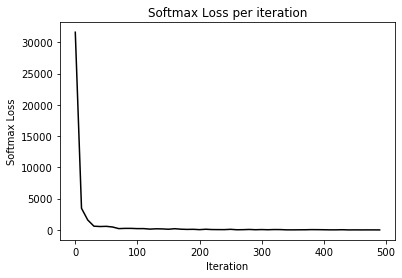

In [41]:
import matplotlib.pyplot as plt

eval_indices = range(0, training_iters, display_step)

plt.plot(eval_indices, train_loss, 'k-')
plt.title("Softmax Loss per iteration")
plt.xlabel('Iteration')
plt.ylabel('Softmax Loss')
plt.show()

No handles with labels found to put in legend.


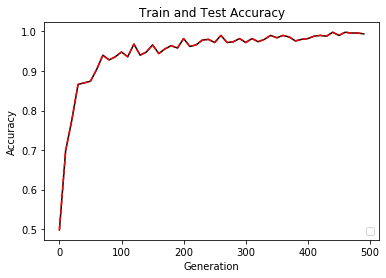

In [42]:
plt.plot(eval_indices, train_acc, 'k-')
plt.plot(eval_indices, test_acc, 'r--')
plt.title('Train and Test Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


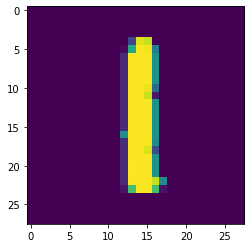

In [43]:
plt.imshow(batch_x[1].reshape(28, 28))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


TypeError: Image data of dtype object cannot be converted to float

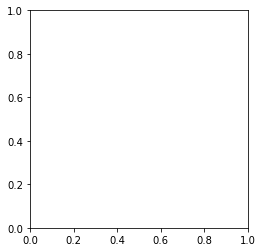

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot='true')

batch_x, batch_y = mnist.train.next_batch(10)

import matplotlib.pyplot as plt

plt.imshow(batch_x[0].reshape)